In [10]:
#importing libraries

import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
import random

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
keras = tf.keras

In [2]:
#reading the dataset
dataset_dir = "./dataset"

print(os.listdir(dataset_dir))
train_classes = os.listdir(dataset_dir + "/train")
print(train_classes)
test_classes = os.listdir(dataset_dir + "/test")
print(test_classes)

['test', 'train']
['Closed', 'no_yawn', 'Open', 'yawn']
['Closed', 'no_yawn', 'Open', 'yawn']


In [17]:
#loading the dataset
dataset_dir = "./dataset"

def load_images(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(directory+category)):
            image_path = os.path.join(directory,category,filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224))
            image = image.astype('float32') / 255.0  # Scale pixel values to [0, 1]
            images.append(image)
            labels.append(category)

    images = np.array(images,dtype='float32')
    return images, labels


#loading dataset
print('*******Loading Train Data*******')
train_ds = load_images(dataset_dir + '/train/' )
print('*******Loading Test Data*******')
test_ds = load_images(dataset_dir + '/test/')

*******Loading Train Data*******


  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

*******Loading Test Data*******


  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

In [11]:
#displaying images function
def display_images_with_labels(images, labels, prediction):
    
    fig, axs = plt.subplots(5, 8, figsize=(15, 10))
    fig.suptitle('Images and Labels')
    for i in range(40):
        axs[i // 8, i % 8].imshow(images[i])
        axs[i // 8, i % 8].axis('off')
        if(prediction):
            axs[i // 8, i % 8].set_title(np.argmax(labels[i]))
        else:
            axs[i // 8, i % 8].set_title(labels[i])
    plt.show()

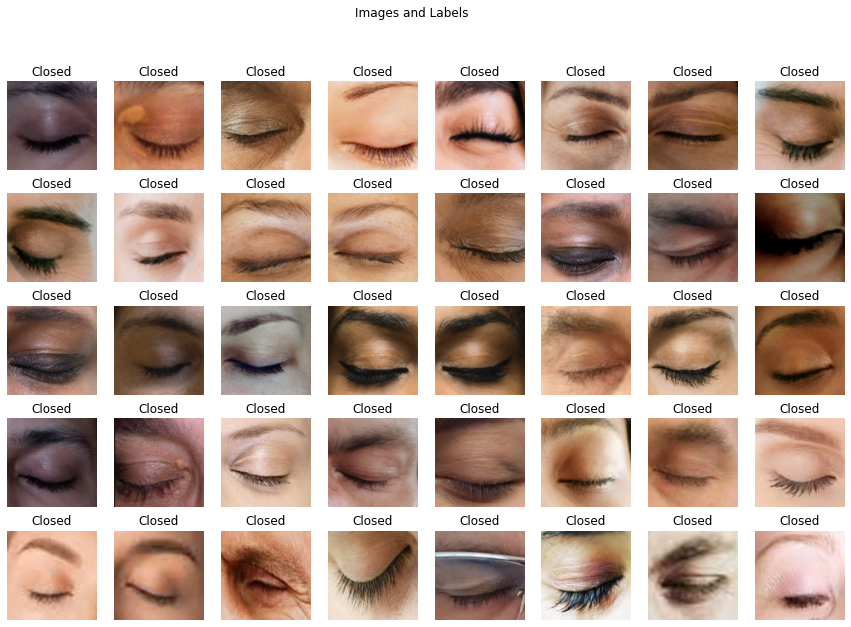

In [18]:
#showing the dataset

display_images_with_labels(train_ds[0], train_ds[1], False)

In [19]:
def display_random_images_with_labels(images, labels):
    """
        Display 40 random images and their labels from the input arrays.
    """
    # Choose 40 random images
    indices = random.sample(range(len(images)), 40)
    random_images = [images[i] for i in indices]
    random_labels = [labels[i] for i in indices]
    
    fig, axs = plt.subplots(5, 8, figsize=(15, 10))
    fig.suptitle('Random Images and Labels')
    for i, (image, label) in enumerate(zip(random_images, random_labels)):
        axs[i // 8, i % 8].imshow(image)
        axs[i // 8, i % 8].axis('off')
        axs[i // 8, i % 8].set_title(label)
    plt.show()

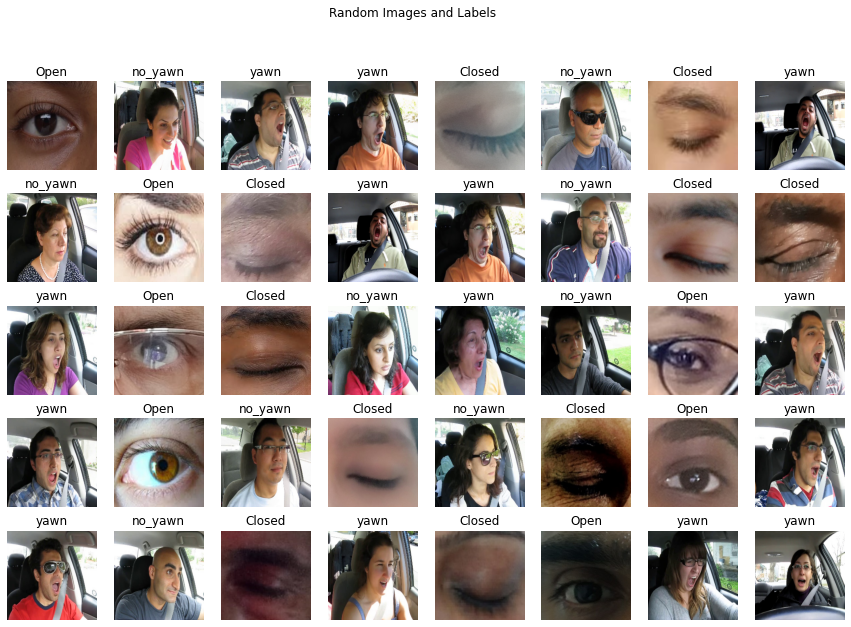

In [20]:
display_random_images_with_labels(train_ds[0], train_ds[1])